In [2]:
# import libraries
import pandas as pd
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# disable warnings, use w caution
import warnings
warnings.filterwarnings('ignore')

# project specific libs
import os
import matplotlib.pyplot as plt
import pathlib

In [3]:
# project specific path
path = '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/'

##### jobs39 #####

In [15]:
# jobs39 is where the first PRJNA will be tested, 16S sequencing
# PRJNA317370
# we need to generate a Q2 mapping file like in OA
q2_oa = pd.read_csv(path + 'outputs/jobs39/oaq2.tsv', sep='\t')

# take columns i think we need
keep = ['BarcodeSequence','LinkerPrimerSequence']

# grab sample IDs
# df_map = q2_oa.loc[:,keep]

df_sra = pd.read_csv(path + 'outputs/jobs39/SraRunTable.txt', sep='\t')
df_sra = df_sra.rename(columns={'Run':'#SampleID'})

# insert in reverse order
for i in keep:
    df_sra.insert(1, i, ['NA' for _ in range(len(df_sra))])

df_sra.to_csv(path + 'outputs/jobs39/qiime_mapping_file.tsv', sep='\t')
df_sra.columns.values
# df_sra['Sample Name']

array(['#SampleID', 'LinkerPrimerSequence', 'BarcodeSequence',
       'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'host',
       'Instrument', 'isolation_source', 'lat_lon', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', '1-Methylhistidine', '3-Methylhistidine', 'Alanine',
       'allo-Isoleucine', 'alpha-Amino-N-butyric-acid',
       'alpha-Aminoadipic-acid', 'Anserine', 'Arginine', 'Asparagine',
       'Aspartic_Acid', 'beta-Alanine', 'beta-Aminoisobutyric-acid',
       'betaine', 'carnitine', 'Carnosine', 'choline', 'Citrulline',
       'Cystathionine_1', 'Cystathionine_2', 'Cystin

##### jobs44 #####

In [35]:
# jobs44
# one partition of HC n=30 has mean age 55.5 (8.80)	
# other partition of 20 disease has mean age 50.7 (10.1)
df_sra = pd.read_csv(path + 'outputs/jobs44/SraRunTable.csv')
df = df_sra[['age','sex']]
df = df.sort_values(by='age',ascending=True)

df_HC = df.iloc[0:30,:]
df_SjD = df.iloc[30:,:]

for df_ in [df_HC, df_SjD]:
    print(np.mean(df_.age),np.std(df_.age,ddof=1))

df.age.values

47.233333333333334 7.103584978039602
63.05 5.780866808068802


array([24, 36, 37, 40, 41, 42, 42, 44, 44, 45, 46, 47, 48, 48, 48, 48, 48,
       48, 49, 50, 52, 52, 53, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57,
       57, 59, 59, 60, 60, 61, 63, 64, 65, 65, 66, 67, 68, 71, 74, 75])

In [36]:
df_sra.columns.values

array(['Run', 'age', 'Assay Type', 'AvgSpotLen', 'Bases',
       'BIOMATERIAL_PROVIDER', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_data',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'Instrument', 'isolate',
       'Library Name', 'LibraryLayout', 'LibrarySelection',
       'LibrarySource', 'Organism', 'Platform', 'ReleaseDate',
       'create_date', 'version', 'Sample Name', 'sex', 'SRA Study',
       'tissue'], dtype=object)

In [99]:
def random_split_array(arr, split_ratio):
    np.random.shuffle(arr)  # Shuffle the array in place
    split_index = int(len(arr) * split_ratio)
    arr1 = arr[:split_index]
    arr2 = arr[split_index:]
    return arr1, arr2

# grab all combinations of ages
# combos = list(itertools.combinations(df.age, 20))

# Example usage:
my_array = df.age.values


for i in range(100000):
    split_ratio = 0.4
    arr1, arr2 = random_split_array(my_array, split_ratio)
    
    mu1 = np.mean(arr1)
    s1 = np.std(arr1,ddof=1)
    
    mu2 = np.mean(arr2)
    s2 = np.std(arr2,ddof=1)
    
    if 55.44 < mu2 and mu2 < 55.54:
        if 8.794 < s2 and s2 < 8.805:
            #if 50.54 < mu1 and mu1 < 50.74:
             #   if 10.0 < s1 and s1 < 10.2:
            print('found')
            print(arr1)
            print(mu1,s1)
            print(arr2)
            print(mu2,s2)

#np.testing.assert_approx_equal(mu1, 50.7, significant=2)
#np.testing.assert_approx_equal(s1, 10.1, significant=2)
#np.testing.assert_approx_equal(mu2, 55.5, significant=2)
#np.testing.assert_approx_equal(s2, 8.80, significant=3)

print('Done')


found
[36 42 41 52 48 48 37 75 46 56 57 52 24 56 55 68 59 64 50 48]
50.7 11.662355093024285
[63 42 60 53 57 61 65 74 48 48 67 55 56 57 57 60 44 54 40 49 45 71 54 59
 48 47 44 55 65 66]
55.46666666666667 8.795505644374852
found
[60 46 24 59 55 41 42 66 52 75 57 59 37 47 40 56 44 42 60 50]
50.6 11.618497049283548
[54 55 67 56 57 65 44 48 64 49 52 53 57 65 48 48 54 55 48 45 56 48 57 68
 74 61 71 63 36 48]
55.53333333333333 8.795505644374852
found
[56 71 64 61 49 42 63 56 52 67 37 40 46 24 48 45 36 53 55 48]
50.65 11.63603748795322
[42 41 47 75 66 48 57 57 59 52 68 48 44 55 44 54 60 65 56 57 60 48 55 57
 48 65 50 59 74 54]
55.5 8.799490580866522
found
[45 63 61 56 42 48 48 36 65 55 37 48 64 41 24 60 67 59 54 40]
50.65 11.63603748795322
[48 50 52 53 48 56 47 75 59 42 68 44 56 74 55 57 57 57 46 54 48 44 55 71
 57 60 52 49 65 66]
55.5 8.799490580866522
found
[55 48 46 68 71 36 48 57 42 47 48 60 37 55 44 45 24 56 60 67]
50.7 11.657841273490336
[53 61 42 49 41 52 66 59 44 75 57 63 57 55 54 57 6

In [78]:
df.label.value_counts()

label
A    30
B    20
Name: count, dtype: int64

In [15]:
# create mapping file
df = pd.read_csv(path + 'outputs/jobs45/gutonlyCRR.csv')
df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Accession')

# get diagnosis column
df['Diagnosis'] = df['Run title'].map(lambda x: x.split('sample:')[-1])

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Accession')
df.index.name = '#SampleID'

# create host subject id
df['HostSubjectId'] = df['ID']

# export
df.to_csv(path + 'outputs/jobs45/qiime_mapping_file.tsv', sep='\t')
df.head()

,ID,Run title,BioProject accession,Experiment accession,Run data file type,Read filename 1,Read file1 MD5,DownLoad Read file1,Read filename 2,Read file2 MD5,...,DownLoad Index file2,Reference file name,MD5 for reference file,Assembly Name or Accession,Assembly Accession URL,other_db,accession_in_other_db,other_db_url,Diagnosis,HostSubjectId
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
CRR442594,2,D2:Amplicon sequence of human fecal sample:non...,PRJCA008752,CRX385340,fastq,CRR442594_f1.fq.gz (12307086 bytes),b7f3cf4ef58a2909b282c04ea9ca4291,ftp://download.big.ac.cn/gsa/CRA006415/CRR4425...,CRR442594_r2.fq.gz (11537276 bytes),2f8c75231ad1ca51500d811f4aaa5124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-pSS patient,2
CRR442598,6,D6:Amplicon sequence of human fecal sample:non...,PRJCA008752,CRX385344,fastq,CRR442598_f1.fq.gz (10916305 bytes),c4a7ee34c4b46ef345cf873e5cf2bf00,ftp://download.big.ac.cn/gsa/CRA006415/CRR4425...,CRR442598_r2.fq.gz (10506223 bytes),9efcb1b6596069129c67c2a87531d40e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-pSS patient,6
CRR442600,8,D8:Amplicon sequence of human fecal sample:pSS...,PRJCA008752,CRX385346,fastq,CRR442600_f1.fq.gz (12975507 bytes),3149e0d5588d0cea4b58c1a2706c7e43,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442600_r2.fq.gz (12152647 bytes),038b8b7280f629bba6e6fa50eb5b78f2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,8
CRR442603,11,D11:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385349,fastq,CRR442603_f1.fq.gz (10712320 bytes),854db81c703df4130019c80e717ccad7,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442603_r2.fq.gz (10213484 bytes),692bcab19cb7f412000af2869de5355f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,11


##### jobs46 #####

In [24]:
# jobs46
df = pd.read_csv(path + 'outputs/jobs46/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'RA' if 'RA' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs46/qiime_mapping_file.tsv', sep='\t')

    
# check 26 HC 26 RA
df.Diagnosis.value_counts()

# df.head()


Diagnosis
RA             26
HC             26
categorical     1
Name: count, dtype: int64

In [130]:
# for AMPAIM

### all data
j_to_res = {
    'jobs09': {
        'Diagnosis': 'RA',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs09/lefse_results.res'
    },
    'jobs10':{
        'Diagnosis': 'PsO',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs10/lefse_results.res'
    },
    'jobs11':{
        'Diagnosis': 'PsA',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs11/lefse_results.res'
    },
    'jobs12':{
        'Diagnosis': 'SjD',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs12/lefse_results.res'
    },
    'jobs13':{
        'Diagnosis': 'SLE',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs13/lefse_results.res'
    },
    'jobs14':{
        'Diagnosis': 'NSS',
        'Cohort': 'AMPAIM',
        'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs14/lefse_results.res'
    },
    'jobs41':{
        'Diagnosis': 'SLE',
        'Cohort': 'Su2020',
        'LEfSe_path': path + 'outputs/jobs41/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-HC-or-SLE-G.Diagnosis.NA.tsv'
    },
    'jobs43':{
        'Diagnosis': 'AxSpA',
        'Cohort': 'Gill2022',
        'LEfSe_path': path + 'outputs/jobs43/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    },
    'jobs46':{
        'Diagnosis': 'RA',
        'Cohort': 'Yu2022',
        'LEfSe_path': path + 'outputs/jobs46/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv'
    }
}

for j in ['jobs09','jobs11','jobs13','jobs41','jobs43','jobs46']:
    # grab res dict
    res = j_to_res[j]

    # grab df and name columns
    if '.res' in res['LEfSe_path']:
        header = None
    elif '.taxa' in res['LEfSe_path']:
        header = 0
    
    df_lefse = pd.read_csv(res['LEfSe_path'], sep='\t', header=header, names =['Taxa','X','Direction','LDA','p'])
   
    # drop na
    df_lefse = df_lefse[df_lefse['p'] != '-']
    
    # cast to float
    df_lefse['p'] = df_lefse['p'].astype(float)

    # filter on NA 
    df_lefse = df_lefse[~np.isnan(df_lefse['LDA'])]

    # save
    for d in df_lefse.Direction.unique():    
        df = df_lefse[df_lefse['Direction'] == d] 
        df.to_csv(path + 'outputs/jobs100/' + res['Cohort'] + '_' + res['Diagnosis'] + '_' + d + '.tsv', sep='\t')
        

#df = df[np.isnan(df['LDA'])]
#LDAnan = df.Taxa.values

# print(LDAnan)
print(len(df))



33


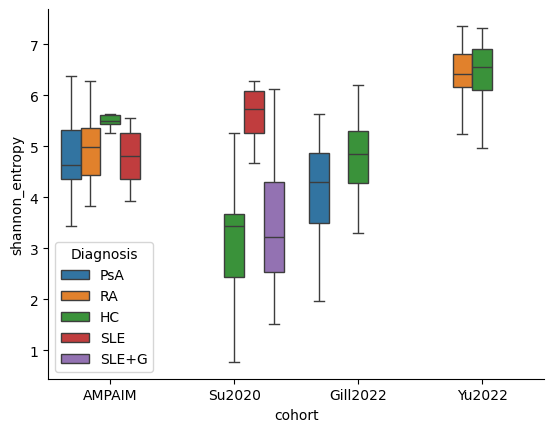

In [170]:
# define replacements prior to alpha
sub_dict=  {'healthy control': 'HC',
                     'healthy': 'HC',
                     'Healthy': 'HC',
                     'SLE-G': 'SLE',
                     'axial spondyloarthritis': 'PsA'}

# alpha plots
dfs = []
# ampaim
df = pd.read_csv(path + 'outputs/jobs27/df_alpha.tsv', sep='\t')
df['cohort'] = 'AMPAIM'
df = df.replace(sub_dict)
    
dfs.append(df)



for job in ['jobs41', 'jobs43', 'jobs46']:
    # load df
    df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/shannon_metadata.tsv', sep='\t')

    # rename
    df = df.rename(columns={'host_disease':'Diagnosis'})

    # replace
    df = df.replace(sub_dict)
    
    # q2 modifications
    df = df.set_index('id')
    df = df.drop('#q2:types')

    # set cohort
    df['cohort'] = j_to_res[job]['Cohort']

    # append to list
    dfs.append(df)

df_merge = pd.concat(dfs)
df_merge = df_merge.dropna(how='any',axis=1)

df_merge['shannon_entropy'] = df_merge['shannon_entropy'].astype(float)

# filter
keep = ['PsA','HC','SLE','SLE+G','SLE-G','RA','axial spondyloarthritis']
df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

sns.boxplot(data=df_merge,x='cohort',y='shannon_entropy',hue='Diagnosis',showfliers=False)
#sns.stripplot(data=df_merge,x='cohort',y='shannon_entropy',hue='Diagnosis',legend=None,dodge=True,color='gray')
sns.despine()
#  plt.tight_layout()

In [189]:
# beta plots
dfs = []
# ampaim
df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/permanova-pairwise.csv')
df['cohort'] = 'AMPAIM'
df = df.replace({'healthy':'HC',
                 'sle':'SLE'})
df = df[df['Group 1'].isin(keep)]
df = df[df['Group 2'].isin(keep)]
df['comparison'] = df['Group 1'] + '_' + df['Group 2']
dfs.append(df)
# validation
for job in ['jobs41','jobs43','jobs46']:
    # load df
    df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/permanova-pairwise.csv')
    
    # set cohort
    df['cohort'] = j_to_res[job]['Cohort']

    # replace
    df = df.replace(sub_dict)
    
    # append to list
    dfs.append(df)


df_merge = pd.concat(dfs)
df_merge.index = [i for i in range(len(df_merge))]
df_merge = df_merge.dropna(how='any',axis=1)

# swap group2 HC with group1
# df_merge_final = df_merge.copy()
for i,row in df_merge.iterrows():
    print(i)
    if row.iloc[1] == 'HC':
        print('checking')
        temp = row.iloc[0]
        print(temp)
        df_merge.iloc[i, 0] = 'HC'
        df_merge.iloc[i, 1] = temp

# df_merge['shannon_entropy'] = df_merge['shannon_entropy'].astype(float)

# filter
#keep = ['PsA','HC','SLE','SLE+G','SLE-G','RA','axial spondyloarthritis']
#df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

#sns.boxplot(data=df_merge,x='cohort',y='shannon_entropy',hue='Diagnosis',showfliers=False)
#sns.despine()
df = df_m
df_merge

0
checking
RA
1
2
3
4
5
6
checking
PsA
7


,Group 1,Group 2,Sample size,Permutations,pseudo-F,p-value,q-value,cohort
0,HC,RA,50,999,1.349725,0.101,0.238000,AMPAIM
1,RA,SLE,49,999,1.119655,0.279,0.450692,AMPAIM
2,HC,SLE,11,999,1.192808,0.208,0.364000,AMPAIM
3,HC,SLE+G,40,999,1.743073,0.026,0.026000,Su2020
4,HC,SLE,37,999,8.483951,0.001,0.001500,Su2020
5,SLE+G,SLE,37,999,6.431574,0.001,0.001500,Su2020
6,HC,PsA,54,999,0.661746,0.722,0.722000,Gill2022
7,HC,RA,52,999,1.402149,0.037,0.037000,Yu2022


In [105]:
# automatic parsing of pairwise lefses for queries
import itertools
# list(itertools.combinations(['A','B','C'], 2))

jobns = []
taxas = []
mwus = []
mwups = []
tts = []
ttps = []

for job in ['jobs09']:#'jobs41','jobs43','jobs46']:
    print(job)
    if 'jobs4' in job:
        df = pd.read_csv(path + 'outputs/' + job + '/Analysis_lefse_0/tables/Diagnosis/lefse_format.taxa_table_L7.Diagnosis.NA.tsv', 
                         sep='\t', 
                         header=None)
    else:
        df = pd.read_csv(path + 'outputs/' + job + '/lefse_table.tsv', 
                         sep='\t',
                         header=None)
    df = df.T
    df.columns = df.iloc[0,:]
    df = df.drop(0) # drops the row of col names
    df = df.iloc[:,1:] # drops one of the Diagnosis cols
    df['SampleID'] = df['HostSubjectId'] + '_' + df['Diagnosis']
    df = df.drop(['Diagnosis','HostSubjectId'],axis=1)
    df = df.set_index('SampleID')
    
    # normalize columns
    df = df.astype(float)
    df = df.div(df.sum(axis=1),axis=0)
    
    # put back diagnosis col
    df['Diagnosis'] = df.index.map(lambda x: x.split('_')[-1])
    
    # dict to store resluts
    q_to_t = {}
    queries = ['f__Rikenellaceae']
    queries = [x.replace('.','|') for x in LDAnan]
    #queries = [x.replace('__','protect') for x in queries]
    #queries = [x.replace('_','-') for x in queries]
    #queries = [x.replace('protect','__') for x in queries]

    for q in queries:
        q_to_t[q] = []
        for f in df.columns.values:
            if q in f:
                # print(f)
                q_to_t[q].append(f)
        
    # do MWU on each col and the aggregate
    for q in queries:
        print('query: ' + q)
        int_taxa = q_to_t[q]
        print(len(int_taxa))
        # subset on taxa of interest
        df_sub = df[int_taxa] 
        # create new total 'collapsed genus'
        df_sub['total_' + q] = df_sub.sum(axis=1)
        # bring back Diagnosis column
        df_sub['Diagnosis'] = df['Diagnosis']
        for t in int_taxa + ['total_' + q]:
            diagnoses = df_sub['Diagnosis'].unique()

            # do all pairwise combos
            for pair in list(itertools.combinations(diagnoses, 2)):
                d0, d1 = pair
                print(t)
                print(d0,d1)
                df_d0 = df_sub[df_sub['Diagnosis'] == d0]
                df_d1 = df_sub[df_sub['Diagnosis'] == d1]
                u,p1 = scipy.stats.mannwhitneyu(df_d0[t],df_d1[t])
                print('MWU: u=' + str(np.round(u,2)) + ', p=' + str(np.round(p,3)))
                r,p2 = scipy.stats.ttest_ind(df_d0[t],df_d1[t])
                print('TT: t=' + str(np.round(r,2)) + ', p=' + str(np.round(p,3)))
                print('\n')
                jobns.append(job)
                taxas.append(t)
                mwus.append(u)
                mwups.append(p1)
                tts.append(r)
                ttps.append(p2)

                plt.figure(figsize=(4,3))
                sns.boxplot(data=df_sub, x='Diagnosis', y=t, showfliers=False)
                sns.stripplot(data=df_sub, x='Diagnosis', y=t,legend=None)
                plt.tight_layout()
                sns.despine()
                plt.savefig(path + 'outputs/jobs100/' + d0 + '_' + d1 + '_' + t + '.pdf')
                plt.close()


df_ref = pd.DataFrame({'job': jobns, 'taxa': taxas, 'MWU': mwus, 'MWU_p': mwups, 'ttest': tts, 'ttest_p': ttps})
df_ref

jobs09
query: d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|__|__
1
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|__|__
RA healthy
MWU: u=107.5, p=0.012
TT: t=-2.87, p=0.012


total_d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|__|__
RA healthy
MWU: u=107.5, p=0.012
TT: t=-2.87, p=0.012


query: d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Peptostreptococcales|f__Peptostreptococcaceae_256921|g__Peptostreptococcus
1
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Peptostreptococcales|f__Peptostreptococcaceae_256921|g__Peptostreptococcus
RA healthy
MWU: u=107.5, p=0.012
TT: t=-2.87, p=0.012


total_d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Peptostreptococcales|f__Peptostreptococcaceae_256921|g__Peptostreptococcus
RA healthy
MWU: u=107.5, p=0.012
TT: t=-2.87, p=0.012


query: d__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__RF32|f__CAG_239|g__51_20
0
total_d__Bacteria|p__Proteobacteria|c__A

,job,taxa,MWU,MWU_p,ttest,ttest_p
0,jobs09,d__Bacteria|p__Actinobacteriota|c__Coriobacter...,107.5,0.008928,-2.872104,0.006099
1,jobs09,total_d__Bacteria|p__Actinobacteriota|c__Corio...,107.5,0.008928,-2.872104,0.006099
2,jobs09,d__Bacteria|p__Firmicutes_A|c__Clostridia_2584...,107.5,0.008928,-2.872104,0.006099
3,jobs09,total_d__Bacteria|p__Firmicutes_A|c__Clostridi...,107.5,0.008928,-2.872104,0.006099
4,jobs09,total_d__Bacteria|p__Proteobacteria|c__Alphapr...,129.0,1.000000,NaN,NaN
5,jobs09,total_d__Bacteria|p__Firmicutes_A|c__Clostridi...,129.0,1.000000,NaN,NaN
6,jobs09,d__Bacteria|p__Firmicutes_A|c__Clostridia_2584...,90.0,0.004720,-1.933704,0.059185
7,jobs09,total_d__Bacteria|p__Firmicutes_A|c__Clostridi...,90.0,0.004720,-1.933704,0.059185
8,jobs09,total_d__Bacteria|p__Firmicutes_A|c__Clostridi...,129.0,1.000000,NaN,NaN
9,jobs09,total_d__Bacteria|p__Firmicutes_D|c__Bacilli|o...,129.0,1.000000,NaN,NaN


In [103]:
taxa = df.columns.values
for t in taxa:
    if '258483' in t:
        print(t)
    # d__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__RF32|f__CAG_239|g__51_20

d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Christensenellales|f__CAG-74|g__
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Christensenellales|f__Christensenellaceae|g__Christensenella
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Lachnospirales|f__Lachnospiraceae|g__Eubacterium_I
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Lachnospirales|f__Lachnospiraceae|g__Coprococcus_A_187866
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A_141781
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Oscillospirales|f__Oscillospiraceae_88309|__
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Oscillospirales|f__Ruminococcaceae|g__Bittarella
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Oscillospirales|f__Acutalibacteraceae|g__Clostridium_A
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Lachnospirales|f__Lachnospiraceae|g__Eubacterium_F
d__Bacteria|p__Firmicutes_A|c__Clostridia_258483|o__Oscillospirales|f__Acut